This demo shows how MulitQC intermediate format based on parquet can be used to explore data across multiple runs.

First, let's run MultiQC a bunch of times.

In [5]:
import multiqc
from multiqc import ClConfig

for i, path in enumerate([
    "/Users/vlad/Seqera/multiqc_heavy_examples/Petropoulus_2016/fastqc/ERX112088*",
    "/Users/vlad/Seqera/multiqc_heavy_examples/Petropoulus_2016/fastqc/ERX112089*",
    "/Users/vlad/Seqera/multiqc_heavy_examples/Petropoulus_2016/fastqc/ERX112090*",
    "/Users/vlad/Seqera/multiqc_heavy_examples/Petropoulus_2016/fastqc/ERX112091*",
    "/Users/vlad/Seqera/multiqc_heavy_examples/Petropoulus_2016/fastqc/ERX112092*",
]):
    multiqc.run(
        cfg=ClConfig(
            output_dir=f"/Users/vlad/tmp/combine_tests/run{i + 1}",
            force=True,
        )
    )

           multiqc | /// https://multiqc.info 🔍 v1.28
            config | Loading config settings from: /Users/vlad/.multiqc_config.yaml
       file_search | Search path: /Users/vlad/git/example-timeline


        searching | ████████████████████████████████████████ 100% 2/2                                            nore    

           multiqc | No analysis results found. Cleaning up…
           multiqc | /// https://multiqc.info 🔍 v1.28
            config | Loading config settings from: /Users/vlad/.multiqc_config.yaml
       file_search | Search path: /Users/vlad/git/example-timeline



        searching | ████████████████████████████████████████ 100% 2/2                                            nore    

           multiqc | No analysis results found. Cleaning up…


           multiqc | /// https://multiqc.info 🔍 v1.28
            config | Loading config settings from: /Users/vlad/.multiqc_config.yaml
       file_search | Search path: /Users/vlad/git/example-timeline


        searching | ████████████████████████████████████████ 100% 2/2                                            nore    

           multiqc | No analysis results found. Cleaning up…


           multiqc | /// https://multiqc.info 🔍 v1.28
            config | Loading config settings from: /Users/vlad/.multiqc_config.yaml
       file_search | Search path: /Users/vlad/git/example-timeline


        searching | ████████████████████████████████████████ 100% 2/2                                            nore    

           multiqc | No analysis results found. Cleaning up…
           multiqc | /// https://multiqc.info 🔍 v1.28
            config | Loading config settings from: /Users/vlad/.multiqc_config.yaml
       file_search | Search path: /Users/vlad/git/example-timeline



        searching | ████████████████████████████████████████ 100% 2/2                                            nore    

           multiqc | No analysis results found. Cleaning up…


In [6]:
%ls /Users/vlad/tmp/combine_tests/run*/multiqc_data/parquet/*.parquet

/Users/vlad/tmp/combine_tests/run1/multiqc_data/parquet/fastqc-status-check-heatmap.parquet
/Users/vlad/tmp/combine_tests/run1/multiqc_data/parquet/fastqc_adapter_content_plot.parquet
/Users/vlad/tmp/combine_tests/run1/multiqc_data/parquet/fastqc_overrepresented_sequences_plot.parquet
/Users/vlad/tmp/combine_tests/run1/multiqc_data/parquet/fastqc_per_base_n_content_plot.parquet
/Users/vlad/tmp/combine_tests/run1/multiqc_data/parquet/fastqc_per_base_sequence_quality_plot.parquet
/Users/vlad/tmp/combine_tests/run1/multiqc_data/parquet/fastqc_per_sequence_gc_content_plot.parquet
/Users/vlad/tmp/combine_tests/run1/multiqc_data/parquet/fastqc_per_sequence_quality_scores_plot.parquet
/Users/vlad/tmp/combine_tests/run1/multiqc_data/parquet/fastqc_sequence_counts_plot.parquet
/Users/vlad/tmp/combine_tests/run1/multiqc_data/parquet/fastqc_sequence_duplication_levels_plot.parquet
/Users/vlad/tmp/combine_tests/run1/multiqc_data/parquet/fastqc_top_overrepresented_sequences_table.parquet
/Users/vla

We can run MultiQC on the outputs of those runs even without the access to the original data:

In [4]:
multiqc.run(
    "/Users/vlad/tmp/combine_tests/run1/multiqc_data/multiqc_data.json",
    "/Users/vlad/tmp/combine_tests/run2/multiqc_data/multiqc_data.json",
    cfg=ClConfig(
        output_dir="/Users/vlad/tmp/combine_tests/run1plus2",
        force=True,
    )
)

           multiqc | /// https://multiqc.info 🔍 v1.28
            config | Loading config settings from: /Users/vlad/.multiqc_config.yaml
       file_search | Search path: /Users/vlad/tmp/combine_tests/run1/multiqc_data/multiqc_data.json
       file_search | Search path: /Users/vlad/tmp/combine_tests/run2/multiqc_data/multiqc_data.json


        searching | ████████████████████████████████████████ 100% 2/2                                                   json

 load_multiqc_data | Loading previous run from /Users/vlad/tmp/combine_tests/run1/multiqc_data/multiqc_data.json
 load_multiqc_data | Loading module FastQC
 load_multiqc_data | Loading module Software Versions
 load_multiqc_data | Loading previous run from /Users/vlad/tmp/combine_tests/run2/multiqc_data/multiqc_data.json
 load_multiqc_data | Loading module FastQC
 load_multiqc_data | Loading module Software Versions
     write_results | Data        : /Users/vlad/tmp/combine_tests/run1plus2/multiqc_data   (overwritten)
     write_results | Report      : /Users/vlad/tmp/combine_tests/run1plus2/multiqc_report.html   (overwritten)
           multiqc | MultiQC complete


However, a more interesting usecase is to make use of the columnar nature of the parquet file format to e.g. explore metric trends over time. We would use duckdb to query parquet. They can be as well located e.g. as form of a data lake on an s3 bucket.

In [7]:
import pandas as pd
import duckdb

con = duckdb.connect()
df = con.execute("""
    SELECT 
        sample_name, 
        val_raw as total_sequences,
        timestamp
    FROM '/Users/vlad/tmp/combine_tests/run[1-6]/multiqc_data/parquet/general_stats_table.parquet'
    WHERE metric_name = 'total_sequences'
    ORDER BY timestamp, val_raw
""").df()

print(df[['timestamp', 'sample_name', 'total_sequences']])

                     timestamp sample_name  total_sequences
0   2025-04-09T13:28:40.341728  ERX1120886        2286825.0
1   2025-04-09T13:28:40.341728  ERX1120889        2383241.0
2   2025-04-09T13:28:40.341728  ERX1120888        4886841.0
3   2025-04-09T13:28:40.341728  ERX1120885        4941064.0
4   2025-04-09T13:28:40.341728  ERX1120887        5453345.0
5   2025-04-09T13:28:40.985669  ERX1120890        3857107.0
6   2025-04-09T13:28:40.985669  ERX1120891        4788791.0
7   2025-04-09T13:28:40.985669  ERX1120896        5547967.0
8   2025-04-09T13:28:40.985669  ERX1120894        6603904.0
9   2025-04-09T13:28:40.985669  ERX1120899        6849883.0
10  2025-04-09T13:28:40.985669  ERX1120898        7907728.0
11  2025-04-09T13:28:40.985669  ERX1120897        8527930.0
12  2025-04-09T13:28:40.985669  ERX1120895        8948672.0
13  2025-04-09T13:28:40.985669  ERX1120892        9414506.0
14  2025-04-09T13:28:40.985669  ERX1120893       12015105.0
15  2025-04-09T13:28:41.491834  ERX11209

Let's start with a histogram of total sequences

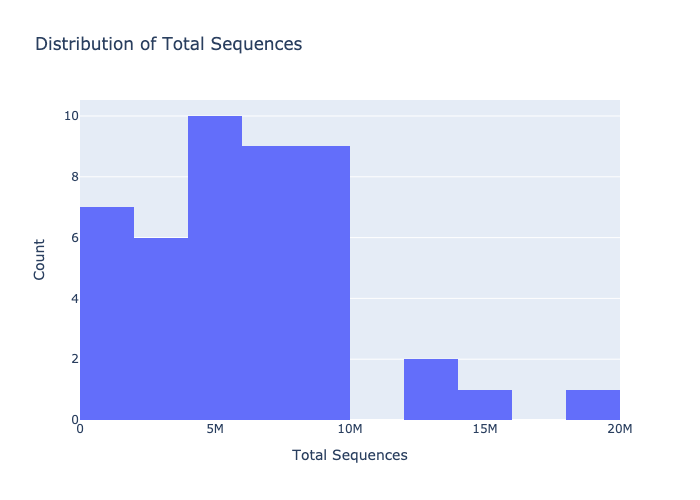

In [11]:
import plotly.graph_objs as go

data = [
    go.Histogram(
        x=df["total_sequences"],
        name="Total Sequences",
        nbinsx=10,
    )
]

layout = {
    "title": "Distribution of Total Sequences",
    "xaxis": {"title": "Total Sequences"},
    "yaxis": {"title": "Count"}
}

go.Figure(data=data, layout=layout).show(renderer="png")

Now let's plot a timeline

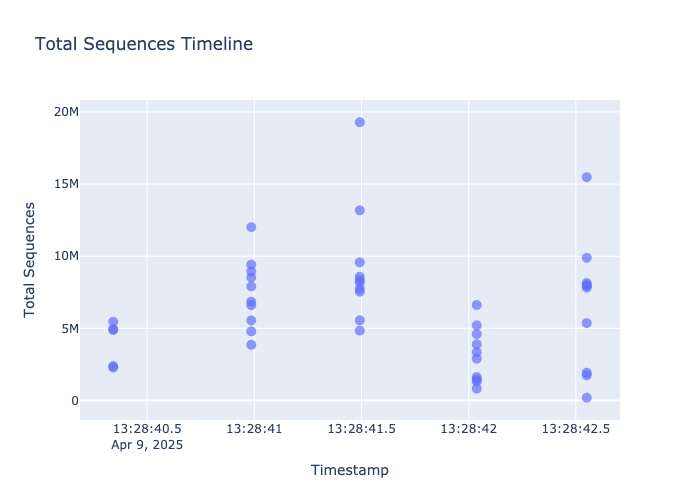

In [10]:
# Ensure timestamps are in datetime format
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Sort by timestamp
df = df.sort_values("timestamp")

data = [
    go.Scatter(
        x=df["timestamp"],
        y=df["total_sequences"],
        mode="markers",
        name="Total Sequences",
        marker=dict(
            size=10,
            opacity=0.7
        )
    )
]

layout = {
    "title": "Total Sequences Timeline",
    "xaxis": {"title": "Timestamp"},
    "yaxis": {"title": "Total Sequences"},
    "hovermode": "closest"
}

go.Figure(data=data, layout=layout).show(renderer="png")